In [1]:
%run IDM_helper_functions.ipynb

In [2]:
# Training data  52500, W_neg = 8400
n_sim_train = 20000
prior_IDM = utils.BoxUniform(low=[8200], high=[8600])
param_IDM = prior_IDM.sample((n_sim_train,))
x_IDM_train = simul_IDM_EM1(np.array(param_IDM))



sim0
sim1000
sim2000
sim3000
sim4000
sim5000
sim6000
sim7000
sim8000
sim9000
sim10000
sim11000
sim12000
sim13000
sim14000
sim15000
sim16000
sim17000
sim18000
sim19000


In [3]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior_IDM)
trainer = trainer.append_simulations(param_IDM, x_IDM_train)
mnle = trainer.train()


C:\Users\ra36qix\Documents\GitHub\sbi\sbi\neural_nets\mnle.py:60: UserWarning: The mixed neural likelihood estimator assumes that x contains
        continuous data in the first n-1 columns (e.g., reaction times) and
        categorical data in the last column (e.g., corresponding choices). If
        this is not the case for the passed `x` do not use this function.
  warnings.warn(


 Neural network successfully converged after 48 epochs.

In [4]:
#
mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")
#mcmc_parameters=dict(init_strategy="resample", num_chains=10, warmup_steps=100)
#mnle_posterior = trainer.build_posterior(mnle, prior)


In [16]:
#prior_LCA = utils.BoxUniform(low=[0, 0.6, 0, 0.2], high=[1, 1.5, 0.4, 0.5])
prior_LCA = utils.BoxUniform(low=[0.5, 1, 0, 0], high=[0.5, 1, 0.1, 0])

LCA_parameters = prior_LCA.sample((20,))

n_trials = 300
sim_num = 20

par_fitted = np.zeros((sim_num,6))

In [18]:
for i in range(sim_num):
    print(i)
    LCA_o = simul_LCA_full_simp(np.tile(LCA_parameters[i,:], (n_trials,1))) # simulate IDM data
    print(LCA_parameters[i,:])
    print(LCA_o[0:10,:])
    mnle_posterior = trainer.build_posterior(
    mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior_IDM
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(LCA_o)
    mnle_map = mnle_posterior.map()
    print(np.array(mnle_map))
    par_fitted[i,:] = np.array(mnle_map)

0
sim0
tensor([0.5000, 1.0000, 0.0085, 0.0000])
tensor([[0.3340, 0.0000],
        [1.0920, 0.0000],
        [2.2600, 0.0000],
        [0.9230, 0.0000],
        [2.8680, 1.0000],
        [0.9250, 0.0000],
        [1.0160, 1.0000],
        [0.7680, 1.0000],
        [0.3530, 1.0000],
        [0.4760, 1.0000]])
[8599.987]
1
sim0
tensor([0.5000, 1.0000, 0.0560, 0.0000])
tensor([[0.6730, 1.0000],
        [2.2050, 1.0000],
        [1.2010, 1.0000],
        [2.1090, 1.0000],
        [0.7170, 0.0000],
        [0.5160, 0.0000],
        [1.1240, 0.0000],
        [0.5290, 0.0000],
        [1.0650, 0.0000],
        [0.2700, 0.0000]])
[8599.985]
2
sim0
tensor([0.5000, 1.0000, 0.0975, 0.0000])
tensor([[0.9850, 0.0000],
        [0.5350, 1.0000],
        [0.7480, 0.0000],
        [0.7260, 1.0000],
        [0.4900, 0.0000],
        [1.1500, 0.0000],
        [0.5470, 0.0000],
        [0.3990, 0.0000],
        [2.6120, 0.0000],
        [0.6650, 0.0000]])
Optimization was interrupted after 190 iterations. 

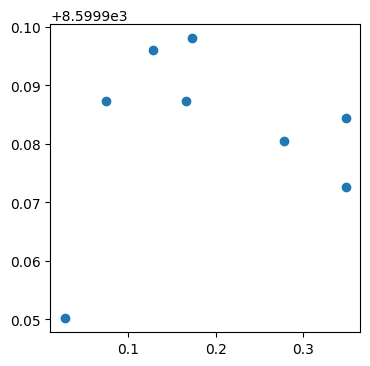

In [15]:
plt.figure(figsize=(4,4))
plt.scatter(LCA_parameters[:8,2], par_fitted[:8,0])

(8200.0, 8600.0)

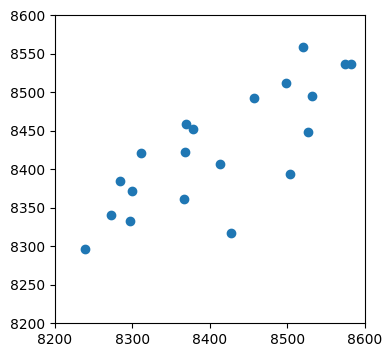

In [57]:
plt.figure(figsize=(4,4))
plt.scatter(param_IDM[:,:], par_fitted[:,:])
plt.xlim(8200,8600)
plt.ylim(8200,8600)
